## Fundamental Data Exploratory Analysis of Stocks
- Using Yahoo Finance to scrape fundamental data for selected biotech company stocks (COVID-19 vaccine manufacturers) as examples.

In [1]:
# import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
from fundamental_data_scraper import *

### Data Scraping

In [2]:
# define the ticker symbols for the stocks of interest
tickers = ['AZN','MRNA','PFE']

# initiate empty dictionaries for balance sheet, income statement, and cashflow statement
balance_sheet, income_statement, cashflow_statement = {},{},{}

# scrape data from Yahoo Finance
for ticker in tickers:
    balance_sheet[ticker] = balance(ticker)
    income_statement[ticker] = income(ticker)
    cashflow_statement[ticker] = cashflow(ticker)

# convert values to numeric type
for ticker in tickers:
    for col in income_statement[ticker].columns:
        income_statement[ticker][col] = income_statement[ticker][col].str.replace(',|- ','',regex=True)
        income_statement[ticker][col] = pd.to_numeric(income_statement[ticker][col], errors = 'coerce')
        cashflow_statement[ticker][col] = cashflow_statement[ticker][col].str.replace(',|- ','',regex=True)
        cashflow_statement[ticker][col] = pd.to_numeric(cashflow_statement[ticker][col], errors = 'coerce')
        if col != 'ttm': # yahoo has ttm column for income statement and cashflow statement only
            balance_sheet[ticker][col] = balance_sheet[ticker][col].str.replace(',|- ','',regex=True)
            balance_sheet[ticker][col] = pd.to_numeric(balance_sheet[ticker][col], errors = 'coerce')

### Balance Sheet

In [3]:
# display a balance sheet of a stock as a quick check
print(f'{tickers[0]} - Balance Sheet')
balance_sheet[tickers[0]]

AZN - Balance Sheet


,12/31/2022,12/31/2021,12/31/2020,12/31/2019
Total Assets,96483000.0,105363000,66729000.0,61377000.0
Total Liabilities Net Minority Interest,59425000.0,66076000,51091000.0,46781000.0
Total Equity Gross Minority Interest,37058000.0,39287000,15638000.0,14596000.0
Total Capitalization,60002000.0,67402000,33127000.0,28857000.0
Common Stock Equity,37037000.0,39268000,15622000.0,13127000.0
Capital Lease Obligations,953000.0,987000,681000.0,675000.0
Net Tangible Assets,-22090000.0,-23116000,-17170000.0,-19374000.0
Working Capital,-3700000.0,3650000,-763000.0,-2554000.0
Invested Capital,65316000.0,69062000,35321000.0,30679000.0
Tangible Book Value,-22090000.0,-23116000,-17170000.0,-19374000.0


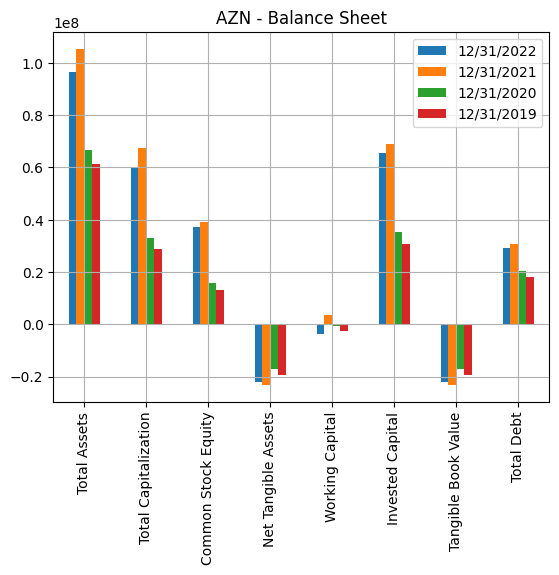

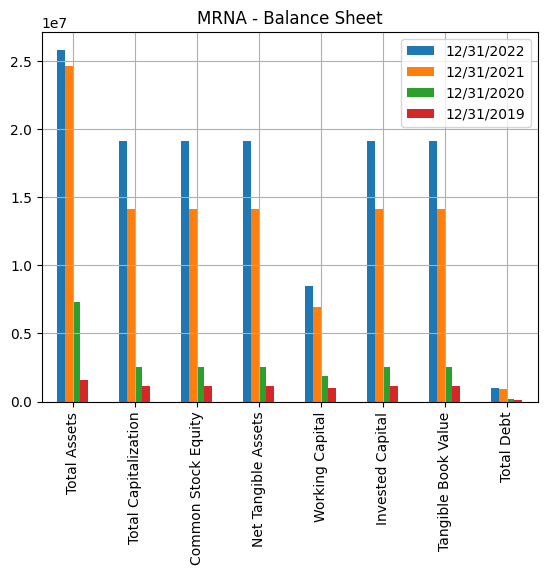

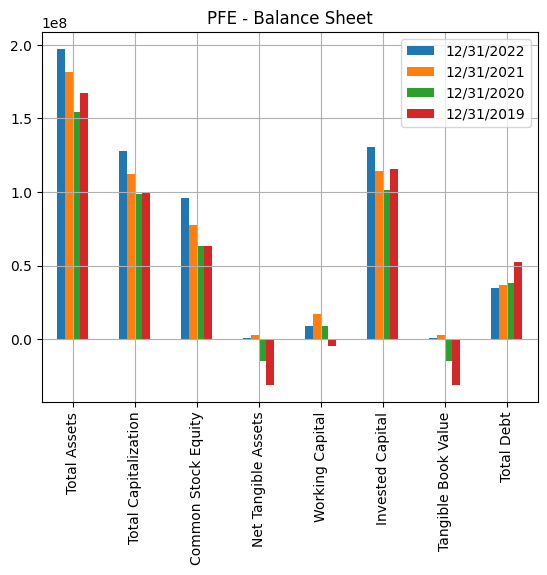

In [4]:
# visualise selected entries from balance_sheet

for ticker in tickers:
    balance_sheet[ticker].loc[['Total Assets', 'Total Capitalization',
       'Common Stock Equity', 'Net Tangible Assets', 'Working Capital', 'Invested Capital',
       'Tangible Book Value', 'Total Debt']].plot(kind='bar')
    # run the line below if all entries need to be visualised
    # balance_sheet[ticker].loc[list(balance_sheet[ticker].index)].plot(kind='barh')
    plt.title(f'{ticker} - Balance Sheet')
    plt.grid()
plt.show()

### Income Statement

In [5]:
# display an income statement of a stock as a quick check
print(f'{tickers[0]} - Income Statement')
income_statement[tickers[0]]

AZN - Income Statement


,ttm,12/31/2022,12/31/2021,12/31/2020,12/31/2019
Total Revenue,44485000.0,44351000.00,37417000.00,26617000.00,24384000.00
Cost of Revenue,9747000.0,12391000.00,12437000.00,5299000.00,4921000.00
Gross Profit,34738000.0,31960000.00,24980000.00,21318000.00,19463000.00
Operating Expense,26589000.0,28203000.00,23924000.00,16156000.00,16265000.00
Operating Income,8149000.0,3757000.00,1056000.00,5162000.00,3198000.00
Net Non Operating Interest Income Expense,-1291000.0,-1251000.00,-1257000.00,-1219000.00,-1260000.00
Pretax Income,6051000.0,2501000.00,-265000.00,3916000.00,1548000.00
Tax Provision,-118000.0,-792000.00,-380000.00,772000.00,321000.00
Net Income Common Stockholders,6163000.0,3288000.00,112000.00,3196000.00,1335000.00
Diluted NI Available to Com Stockholders,6163000.0,3288000.00,112000.00,3196000.00,1335000.00


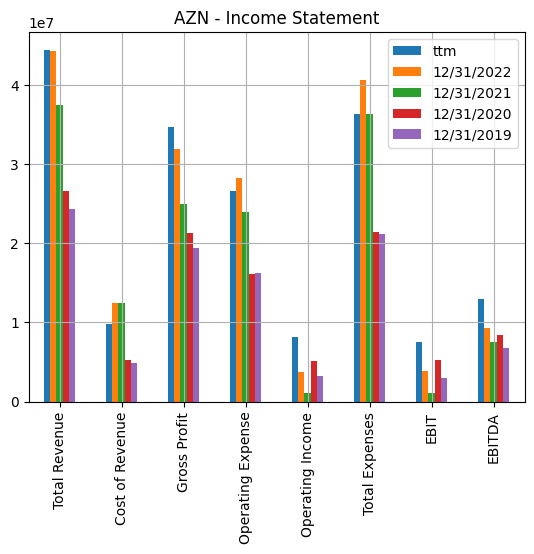

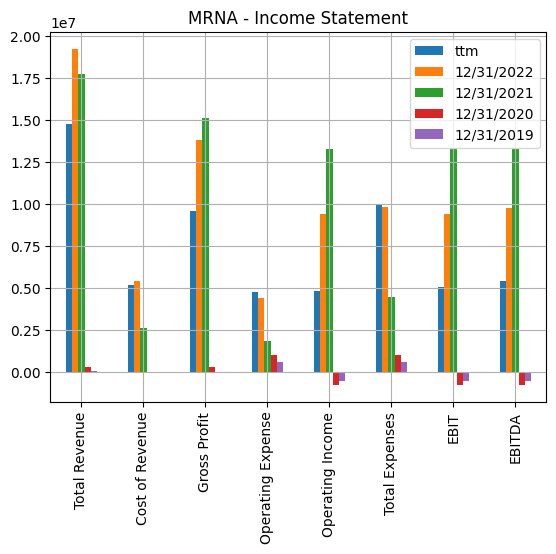

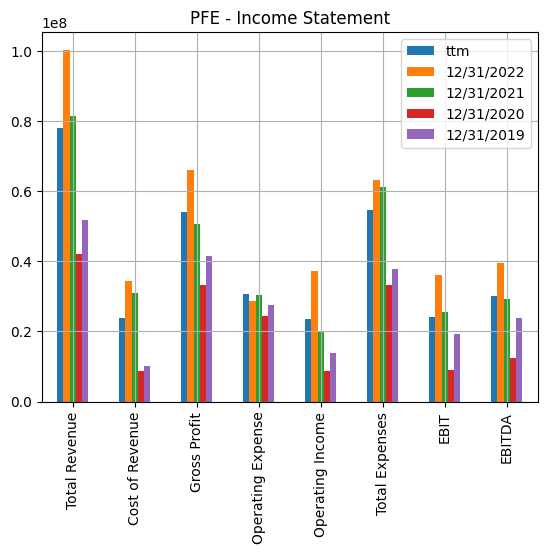

In [6]:
# visualise selected entries from income statement

for ticker in tickers:
    income_statement[ticker].loc[['Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Expense',
                                  'Operating Income', 'Total Expenses', 'EBIT', 'EBITDA']].plot(kind='bar')
    # run the line below if all entries need to be visualised
    #income_statement[ticker].loc[list(income_statement[ticker].index)].plot(kind='barh')
    plt.title(f'{ticker} - Income Statement')
    plt.grid()
plt.show()

### Cashflow Statement

In [7]:
# display a cashflow statement of a stock as a quick check
print(f'{tickers[0]} - Cashflow Statement')
cashflow_statement[tickers[0]]

AZN - Cashflow Statement


,ttm,12/31/2022,12/31/2021,12/31/2020,12/31/2019
Operating Cash Flow,10179000.0,9808000,5963000.0,4799000.0,2969000.0
Investing Cash Flow,-3758000.0,-2960000,-11058000.0,-285000.0,-657000.0
Financing Cash Flow,-5338000.0,-6823000,3649000.0,-2203000.0,-1765000.0
End Cash Position,5563000.0,5983000,6038000.0,7546000.0,5223000.0
Capital Expenditure,-3618000.0,-2571000,-2200000.0,-2606000.0,-2460000.0
Issuance of Capital Stock,29000.0,29000,29000.0,30000.0,3525000.0
Issuance of Debt,3572000.0,0,12929000.0,2968000.0,500000.0
Repayment of Debt,-3422000.0,-1271000,-4759000.0,-1609000.0,-2016000.0
Repurchase of Capital Stock,NaN,-920000,NaN,NaN,NaN
Free Cash Flow,6561000.0,7237000,3763000.0,2193000.0,509000.0


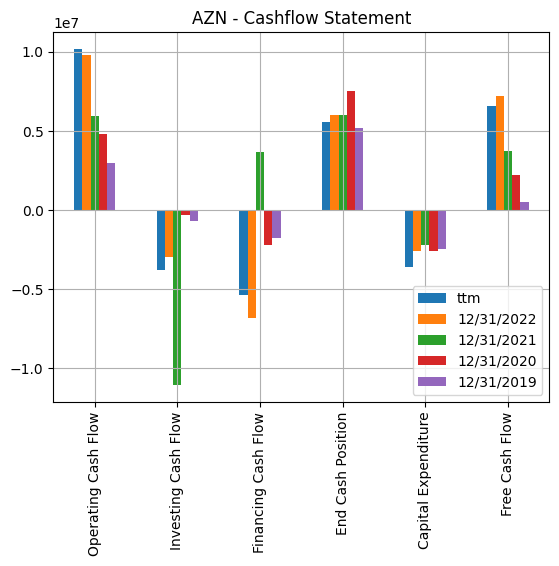

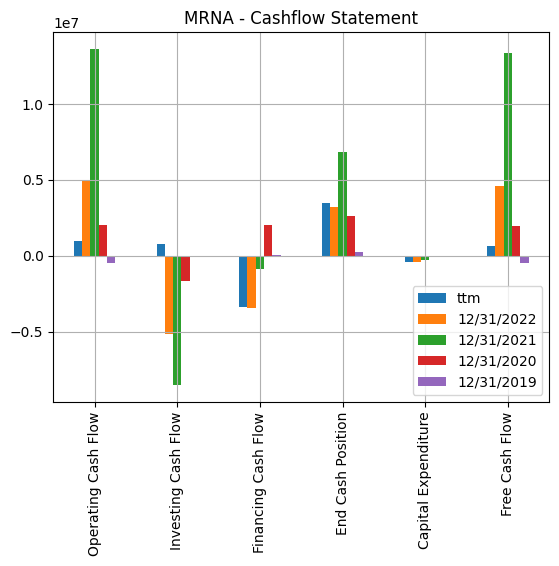

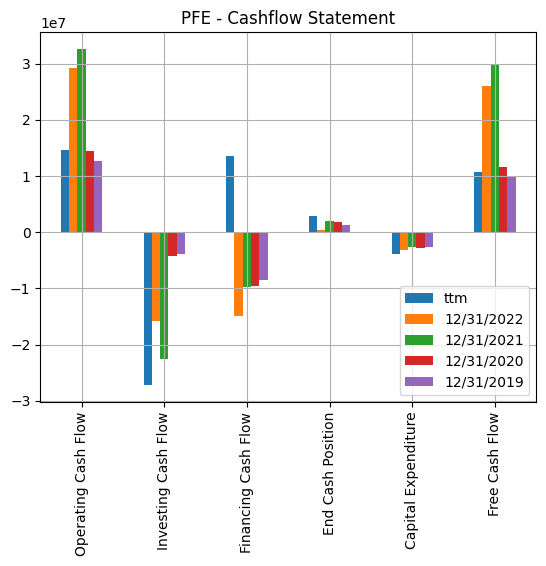

In [8]:
# visualise selected entries from cashflow statement

for ticker in tickers:
    cashflow_statement[ticker].loc[['Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'End Cash Position', 'Capital Expenditure','Free Cash Flow']].plot(kind='bar')
    # run the line below if all entries need to be visualised
    #cashflow_statement[ticker].loc[list(cashflow_statement[ticker].index)].plot(kind='barh')
    plt.title(f'{ticker} - Cashflow Statement')
    plt.grid()
plt.show()